In [ ]:
Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its 
application.

In [ ]:
Min-Max scaling, also known as normalization, is a data preprocessing technique used to scale and transform features of a dataset into a specific range. The purpose of Min-Max scaling is to bring all the values of different features to a common scale without distorting the original distribution of the data. This is particularly important in machine learning algorithms that are sensitive to the scale of input features, such as gradient-based optimization algorithms.

The formula for Min-Max scaling is as follows:

\[ X_{\text{scaled}} = \frac{{X - \text{min}(X)}}{{\text{max}(X) - \text{min}(X)}} \]

Here:
- \(X\) is the original value of a feature.
- \(\text{min}(X)\) is the minimum value of that feature in the dataset.
- \(\text{max}(X)\) is the maximum value of that feature in the dataset.
- \(X_{\text{scaled}}\) is the scaled value of \(X\) in the desired range (usually between 0 and 1).

Here's a simple example in Python to illustrate Min-Max scaling:

In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Create a sample dataset
data = np.array([[2.0, 5.0],
                 [1.0, 8.0],
                 [4.0, 10.0],
                 [6.0, 3.0]])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
scaled_data = scaler.fit_transform(data)

# Display the original and scaled data
print("Original Data:\n", data)
print("\nScaled Data:\n", scaled_data)

Original Data:
 [[ 2.  5.]
 [ 1.  8.]
 [ 4. 10.]
 [ 6.  3.]]

Scaled Data:
 [[0.2        0.28571429]
 [0.         0.71428571]
 [0.6        1.        ]
 [1.         0.        ]]


In [ ]:
In this example, the `MinMaxScaler` from scikit-learn is used to scale the features of the dataset. The `fit_transform` method computes the minimum and maximum values of each feature and scales the data accordingly. The result is a dataset where all the values are in the range [0, 1].

In [ ]:
Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling? 
Provide an example to illustrate its application.

In [ ]:
Unit Vector scaling, also known as vector normalization or unit normalization, is a feature scaling technique that scales the values of a feature to have a unit norm. In other words, it transforms the feature vector to have a length of 1 while preserving its direction. This technique is particularly useful when the magnitude of the features is not important, and you are more concerned about the direction of the data points.

The formula for unit vector scaling is as follows:

\[ X_{\text{scaled}} = \frac{X}{\|X\|} \]

Here:
- \(X\) is the original feature vector.
- \(\|X\|\) is the Euclidean norm (magnitude) of the feature vector.

Unit Vector scaling is different from Min-Max scaling in that it does not scale the values to a specific range (e.g., [0, 1]). Instead, it normalizes the vector such that its magnitude becomes 1.

Here's a Python example using scikit-learn to illustrate Unit Vector scaling:


In [3]:
import numpy as np
from sklearn.preprocessing import Normalizer

# Create a sample dataset
data = np.array([[2.0, 5.0],
                 [1.0, 8.0],
                 [4.0, 10.0],
                 [6.0, 3.0]])

# Initialize the Normalizer with L2 norm (default)
normalizer = Normalizer()

# Transform the data using the normalizer
normalized_data = normalizer.transform(data)

# Display the original and normalized data
print("Original Data:\n", data)
print("\nNormalized Data:\n", normalized_data)

Original Data:
 [[ 2.  5.]
 [ 1.  8.]
 [ 4. 10.]
 [ 6.  3.]]

Normalized Data:
 [[0.37139068 0.92847669]
 [0.12403473 0.99227788]
 [0.37139068 0.92847669]
 [0.89442719 0.4472136 ]]


In [ ]:
In this example, the `Normalizer` from scikit-learn is used to perform Unit Vector scaling with the default L2 norm (Euclidean norm). The result is a dataset where each row has a unit norm, and the direction of the original vectors is preserved.

In [ ]:
Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an 
example to illustrate its application.

In [ ]:
PCA, or Principal Component Analysis, is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional representation while retaining as much of the original variance as possible. The idea is to identify the principal components (linear combinations of the original features) that capture the most significant information in the data.

Here are the main steps of PCA:

1. Standardize the Data: If the features of the dataset are on different scales, it is essential to standardize them.

2. Compute the Covariance Matrix: Calculate the covariance matrix of the standardized data.

3. Compute Eigenvectors and Eigenvalues: Solve the eigenvalue problem to obtain the eigenvectors and eigenvalues of the covariance matrix.

4. Sort Eigenvectors by Eigenvalues: Sort the eigenvectors in descending order based on their corresponding eigenvalues. The eigenvectors with higher eigenvalues capture more variance in the data.

5. Select Principal Components: Choose the top \(k\) eigenvectors to form the new feature space (where \(k\) is the desired dimensionality of the reduced data).

6. Transform the Data: Project the original data onto the selected eigenvectors to obtain the lower-dimensional representation.

Here's a simple example in Python using the Iris dataset:

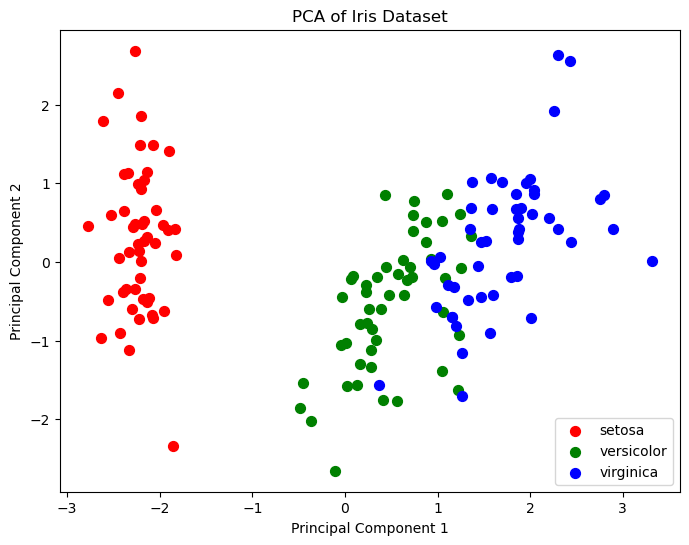

In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
data = iris.data
target = iris.target
columns = iris.feature_names

# Standardize the data
data_std = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Apply PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_std)

# Create a DataFrame for visualization
df_pca = pd.DataFrame(data_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Target'] = target

# Visualize the reduced data
plt.figure(figsize=(8, 6))
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indices_to_keep = df_pca['Target'] == target
    plt.scatter(df_pca.loc[indices_to_keep, 'Principal Component 1'],
                df_pca.loc[indices_to_keep, 'Principal Component 2'],
                c=color, s=50)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend(iris.target_names)
plt.show()

In [ ]:
In this example, PCA is applied to the Iris dataset, and the data is reduced to two principal components for visualization. The resulting plot shows the reduced data points in a 2D space, where each color corresponds to a different class (species) of iris flowers.

In [ ]:
Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature 
Extraction? Provide an example to illustrate this concept.

In [ ]:
PCA (Principal Component Analysis) is often used for feature extraction in the context of dimensionality reduction. Feature extraction involves transforming the original features of a dataset into a new set of features, usually with a lower dimension, while preserving the essential information in the data. PCA achieves feature extraction by identifying and selecting the principal components, which are linear combinations of the original features.

The relationship between PCA and feature extraction can be summarized as follows:

1. Identifying Principal Components: In PCA, the principal components are the eigenvectors of the covariance matrix of the data. These eigenvectors represent the directions of maximum variance in the data.

2. Reducing Dimensionality: The principal components are ordered by their corresponding eigenvalues, with the first principal component capturing the most variance. By selecting a subset of the top \(k\) principal components (where \(k\) is the desired reduced dimensionality), we can create a new feature space that retains the most important information in the original data.

3. Transforming Data: The original data is then projected onto the selected principal components to obtain the lower-dimensional representation.

Here's an example using the Breast Cancer Wisconsin dataset from scikit-learn:

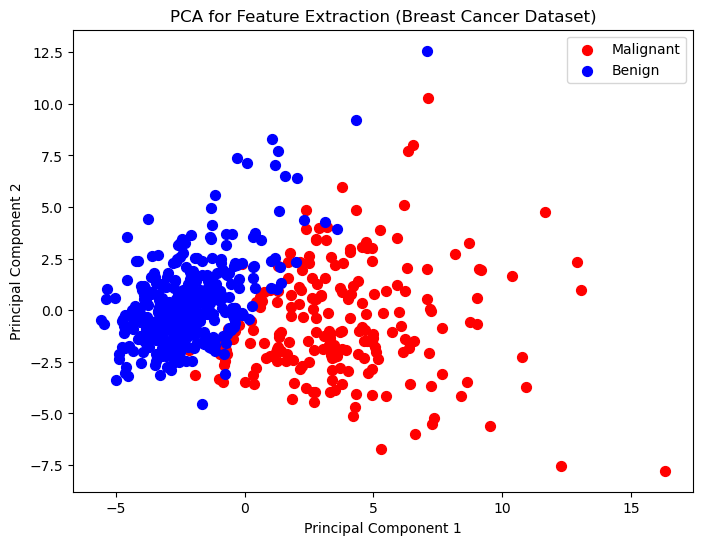

In [5]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

# Load Breast Cancer dataset
cancer = load_breast_cancer()
data = cancer.data
target = cancer.target
columns = cancer.feature_names

# Standardize the data
data_std = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Apply PCA for feature extraction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_std)

# Create a DataFrame for visualization
df_pca = pd.DataFrame(data_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Target'] = target

# Visualize the reduced data
plt.figure(figsize=(8, 6))
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets, colors):
    indices_to_keep = df_pca['Target'] == target
    plt.scatter(df_pca.loc[indices_to_keep, 'Principal Component 1'],
                df_pca.loc[indices_to_keep, 'Principal Component 2'],
                c=color, s=50)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA for Feature Extraction (Breast Cancer Dataset)')
plt.legend(['Malignant', 'Benign'])
plt.show()

In [ ]:
In this example, PCA is applied to the Breast Cancer Wisconsin dataset, and the data is reduced to two principal components for visualization. The plot shows the reduced data points in a 2D space, with different colors representing malignant and benign tumors. The lower-dimensional representation capturmost significant variation in the original feature space.

In [ ]:
Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset 
contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to 
preprocess the data.

In [ ]:
In the context of building a recommendation system for a food delivery service, you might have a dataset with features such as price, rating, delivery time, and possibly others. Min-Max scaling can be a useful preprocessing technique to ensure that these features are on a consistent scale, which can be important for certain recommendation algorithms that are sensitive to the scale of input features.

1. Understand the Features:
   - Identify the numerical features in your dataset, such as price, rating, and delivery time, that you want to include in your recommendation system.

2. Check for Differing Scales:
   - Examine the range of values for each feature. If the features are on different scales (e.g., price might have values in the tens or hundreds, while rating is on a scale of 1 to 5), it's a good idea to standardize them to a common range.

3. Apply Min-Max Scaling:
   - Use the Min-Max scaling formula to scale each feature to a specific range, commonly between 0 and 1. The formula is as follows:
     \[ X_{\text{scaled}} = \frac{{X - \text{min}(X)}}{{\text{max}(X) - \text{min}(X)}} \]
   - This transformation ensures that all the values are proportionally represented within the specified range.

4. Implementation in Python:
   - Here's a simple example using Python and scikit-learn:
This code snippet demonstrates how to use the `MinMaxScaler` from scikit-learn to scale the specified features.

5. Check the Resulting Data:
   - After applying Min-Max scaling, inspect the transformed data to ensure that the features are now within the desired range (typically between 0 and 1).

Min-Max scaling helps ensure that no single feature dominates the others due to differences in scale, and it can contribute to the stability and convergence of certain recommendation algorithms during training.

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your dataset with columns like 'price', 'rating', 'delivery_time'
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected features
data[['price', 'rating', 'delivery_time']] = scaler.fit_transform(data[['price', 'rating', 'delivery_time']])



IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
Q6. You are working on a project to build a model to predict stock prices. The dataset contains many 
features, such as company financial data and market trends. Explain how you would use PCA to reduce the 
dimensionality of the dataset.

In [ ]:
When working on a project to predict stock prices with a dataset containing numerous features, PCA (Principal Component Analysis) can be employed to reduce the dimensionality of the dataset. Dimensionality reduction is beneficial in this context because it can help mitigate the curse of dimensionality, enhance model interpretability, and potentially improve the model's generalization performance.

Here's a step-by-step explanation of how we can use PCA to reduce the dimensionality of the stock price prediction dataset:

1. Understand the Features:
   - Identify the features in your dataset, which might include various financial metrics, market trends, and other relevant variables.

2. Standardize the Data:
   - Standardize the data by subtracting the mean and scaling to unit variance. Standardization is important for PCA because it ensures that all features are on a comparable scale.

3. Apply PCA:
   - Use PCA to transform the standardized data into its principal components. The principal components are linear combinations of the original features that capture the maximum variance in the data.

   ```python
   from sklearn.decomposition import PCA
   from sklearn.preprocessing import StandardScaler

   # Assuming 'data' is our dataset with various features
   # Standardize the data
   data_standardized = StandardScaler().fit_transform(data)

   # Apply PCA
   pca = PCA(n_components=desired_number_of_components)
   data_pca = pca.fit_transform(data_standardized)
   ```

   - Specify the number of components (\(k\)) based on how much variance we want to retain. You can choose \(k\) such that a certain percentage of the total variance is preserved (e.g., 95%).

4. Evaluate Explained Variance:
   - Inspect the explained variance ratio provided by PCA to understand how much variance is retained by each principal component. This information can help you decide on the appropriate number of components.

   ```python
   explained_variance_ratio = pca.explained_variance_ratio_
   ```

5. Select the Number of Components:
   - Choose the number of principal components based on the explained variance ratio. A common approach is to select a number of components that capture a sufficiently high percentage of the total variance (e.g., 95%).

6. Transform the Data:
   - Project the original data onto the selected principal components to obtain the reduced-dimensional representation.

   ```python
   data_reduced = data_pca[:, :selected_number_of_components]
   ```

7. Use the Reduced Data for Modeling:
   - Utilize the reduced-dimensional dataset for training our stock price prediction model.

   ```python
   # Train your model using data_reduced
   ```

Reducing the dimensionality of the dataset through PCA can help us to focus on the most significant patterns and relationships in the data, potentially improving the efficiency and interpretability of your stock price prediction model.

In [ ]:
Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the 
values to a range of -1 to 1

In [ ]:
To perform Min-Max scaling and transform the values of a dataset to a range of -1 to 1, you can use the Min-Max scaling formula and adjust it to the desired range. The formula for Min-Max scaling is:

\[ X_{\text{scaled}} = \frac{{X - \text{min}(X)}}{{\text{max}(X) - \text{min}(X)}} \]

For the desired range of -1 to 1, the formula becomes:

\[ X_{\text{scaled}} = \frac{{X - \text{min}(X)}}{{\text{max}(X) - \text{min}(X)}} \times (b - a) + a \]

Where:
- \( a \) is the lower bound of the desired range (-1 in this case).
- \( b \) is the upper bound of the desired range (1 in this case).

Let's apply this formula to the given dataset [1, 5, 10, 15, 20]:


In [8]:
import numpy as np

# Given dataset
data = np.array([1, 5, 10, 15, 20])

# Define the desired range
a = -1
b = 1

# Apply Min-Max scaling
min_val = np.min(data)
max_val = np.max(data)

scaled_data = ((data - min_val) / (max_val - min_val)) * (b - a) + a

print("Original Data:", data)
print("Scaled Data (in the range -1 to 1):", scaled_data)

Original Data: [ 1  5 10 15 20]
Scaled Data (in the range -1 to 1): [-1.         -0.57894737 -0.05263158  0.47368421  1.        ]


In [ ]:
In this example, the values in the given dataset [1, 5, 10, 15, 20] have been Min-Max scaled to the range of -1 to 1.

In [ ]:
Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform 
Feature Extraction using PCA. How many principal components would you choose to retain, and why

In [ ]:
The choice of how many principal components to retain in PCA is typically based on the amount of variance they explain. Principal components are ordered by their corresponding eigenvalues, and higher eigenvalues correspond to principal components that capture more variance in the data. The cumulative explained variance can help you decide on the number of principal components to retain.

1. Compute the Explained Variance:
   - After applying PCA to your dataset, you'll have access to the explained variance ratio for each principal component. This is available through the `explained_variance_ratio_` attribute in scikit-learn.

   ```python
   from sklearn.decomposition import PCA

   # Assuming 'data' is your dataset with features
   pca = PCA()
   pca.fit(data)

   explained_variance_ratio = pca.explained_variance_ratio_
   ```

2. Plot the Cumulative Explained Variance:
   - Create a scree plot or a cumulative explained variance plot. This plot shows the proportion of total variance explained by each principal component and the cumulative explained variance as you go along.

   ```python
   import matplotlib.pyplot as plt

   cumulative_explained_variance = np.cumsum(explained_variance_ratio)

   plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
   plt.xlabel('Number of Principal Components')
   plt.ylabel('Cumulative Explained Variance')
   plt.show()
   ```

3. Choose the Number of Components:
   - Decide on the number of principal components to retain based on the elbow point in the cumulative explained variance plot. The elbow point is where adding more components provides diminishing returns in terms of explaining additional variance.

In practice, a common threshold is to retain enough principal components to explain a certain percentage of the total variance, such as 95% or 99%. The choice may depend on the specific requirements of your application and the trade-off between dimensionality reduction and preserving information.

Let's say you decide to retain 95% of the variance. You would choose the number of principal components (\(k\)) such that:

\[ \frac{\sum_{i=1}^{k} \text{explained\_variance\_ratio}[i]}{\sum_{i=1}^{N} \text{explained\_variance\_ratio}[i]} \geq 0.95 \]

Where \(N\) is the total number of features.

Here's an example using Python:

```python
# Assuming you have computed explained_variance_ratio as shown above
target_explained_variance = 0.95
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Find the number of components to retain
num_components_to_retain = np.argmax(cumulative_explained_variance >= target_explained_variance) + 1

print(f"Number of components to retain to explain {target_explained_variance * 100}% variance: {num_components_to_retain}")
```

This way, we can determine how many principal components to retain based on the explained variance threshold that fits our needs.